In [1]:
%matplotlib inline


# Plotting Cross-Validated Predictions
This example shows how to use `cross_val_predict` to visualize prediction errors.

http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

# 绘制交叉验证预测图
这个例子展示了如何使用 `交叉验证预测`，并可视化预测错误。

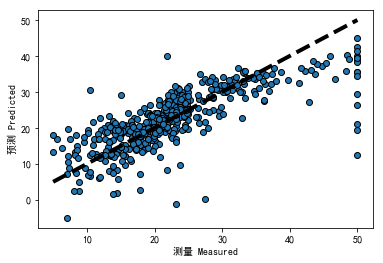

In [12]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

import matplotlib.pyplot as plt

lr = linear_model.LinearRegression() # 线性回归
boston = datasets.load_boston() 
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10) # 交叉验证

fig, ax = plt.subplots()

ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel(u'测量 Measured')
ax.set_ylabel(u'预测 Predicted')

plt.show()

你只有A、B、C三条数据，交叉验证：

1. A、B作训练集，C作测试集；
2. A、C作训练集，B作测试集；
3. B、C作训练集，A作测试集；

然后三组测试结果取平均

# 思想介绍

在使用训练集对参数进行训练的时候，经常会发现人们通常会将一整个训练集分为三个部分（比如mnist手写训练集）。一般分为：训练集（train_set），评估集（valid_set），测试集（test_set）这三个部分。这其实是为了保证训练效果而特意设置的。其中测试集很好理解，其实就是完全不参与训练的数据，仅仅用来观测测试效果的数据。而训练集和评估集则牵涉到下面的知识了。

因为在实际的训练中，训练的结果对于训练集的拟合程度通常还是挺好的（初试条件敏感），但是对于训练集之外的数据的拟合程度通常就不那么令人满意了。因此我们通常并不会把所有的数据集都拿来训练，而是分出一部分来（这一部分不参加训练）对训练集生成的参数进行测试，相对客观的判断这些参数对训练集之外的数据的符合程度。这种思想就称为交叉验证（Cross Validation）

# 定义

交叉验证（Cross Validation），有的时候也称作循环估计（Rotation Estimation），是一种统计学上将数据样本切割成较小子集的实用方法，该理论是由Seymour Geisser提出的。

在给定的建模样本中，拿出大部分样本进行建模型，留小部分样本用刚建立的模型进行预报，并求这小部分样本的预报误差，记录它们的平方加和。这个过程一直进行，直到所有的样本都被预报了一次而且仅被预报一次。把每个样本的预报误差平方加和，称为PRESS(predicted Error Sum of Squares)。

# 基本思想

交叉验证的基本思想是把在某种意义下将原始数据(dataset)进行分组,一部分做为训练集(train set),另一部分做为验证集(validation set or test set),首先用训练集对分类器进行训练,再利用验证集来测试训练得到的模型(model),以此来做为评价分类器的性能指标。

##### https://baike.baidu.com/item/%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81/8543100?fr=aladdin